<a href="https://colab.research.google.com/github/Vishwas1731/task-07/blob/main/TASK_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

    product  total_qty  revenue
0    Eraser         18     54.0
1    Marker         10    250.0
2  Notebook         18    360.0
3       Pen         27    135.0
4    Pencil         35     70.0


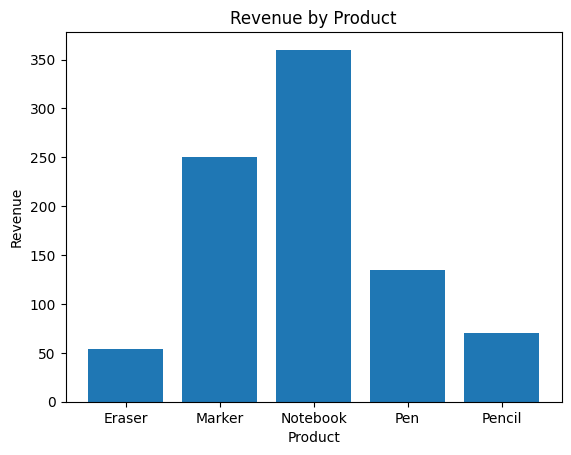

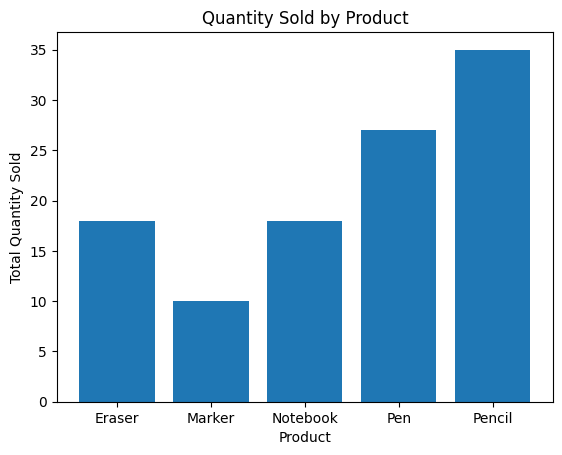

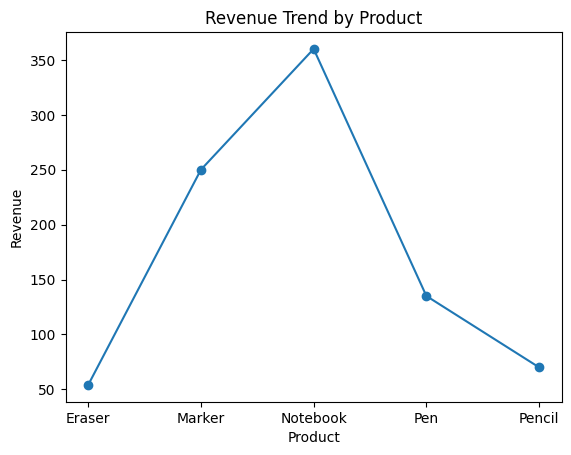

In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

cursor.execute("DELETE FROM sales")

data =sales_data = [
    ("Pen", 10, 5), ("Pen", 5, 5), ("Pen", 12, 5),
    ("Notebook", 8, 20), ("Notebook", 4, 20), ("Notebook", 6, 20),
    ("Pencil", 15, 2), ("Pencil", 20, 2),
    ("Eraser", 10, 3), ("Eraser", 8, 3),
    ("Marker", 6, 25), ("Marker", 4, 25)
]

cursor.executemany("INSERT INTO sales VALUES (?, ?, ?)", data)
conn.commit()

query = """
SELECT product,
       SUM(quantity) AS total_qty,
       SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""

df = pd.read_sql_query(query, conn)

print(df)

plt.figure()
plt.bar(df["product"], df["revenue"])
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.title("Revenue by Product")
plt.savefig("revenue_by_product.png")
plt.show()

plt.figure()
plt.bar(df["product"], df["total_qty"])
plt.xlabel("Product")
plt.ylabel("Total Quantity Sold")
plt.title("Quantity Sold by Product")
plt.savefig("quantity_by_product.png")
plt.show()


plt.figure()
plt.plot(df["product"], df["revenue"], marker='o')
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.title("Revenue Trend by Product")
plt.savefig("revenue_trend.png")
plt.show()

conn.close()